## Tworzenie ramki danych do trenowania modelu

In [1]:
from typing import Dict, List, Any, Self, Optional

import numpy as np
# Konkatenacja powstałych datasetów csv w 1, wraz z transformacją kolumn math, bio, code w jedną - category,
# której jedyne wartości 0, 1, 2 odnoszą się odpowiednio do kategorii math, bio, code.

import pandas as pd
import glob
import sys
import os

from matplotlib.pyplot import title

project_root = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))

if project_root not in sys.path:
    sys.path.append(project_root)

csv_files = glob.glob('../datasets_preprocessing/csv_question_files/*.csv')

dfs = []
for file in csv_files:
    tmpdf = pd.read_csv(file)
    sample = tmpdf.sample(n=5000)
    dfs.append(sample)

df = pd.concat(dfs, ignore_index=True)

def transform_categories(math, bio, code):
    if math == 1:
        return 0
    elif bio == 1:
        return 1
    elif code == 1:
        return 2
    return 2

df['category'] = df.apply(lambda row: transform_categories(row['math'], row['bio'], row['code']), axis=1)

# Usunięcie kolumn math, bio, code z df — są zastąpione category
df.drop(['math', 'bio', 'code'], axis=1, inplace=True)

In [2]:
df.sample(n=10)

,question,tags_str,category
10746,Dot product equivalent for complex numbers,"complex-numbers,terminology",0
8772,"Tracking 1400+ client codes, multi-threading n...","python,git",2
14722,Is the sum of two to-Lebesgue measurable funti...,"real-analysis,measure-theory",0
4885,ChIP-seq vs ChIP-exo,"dna-sequencing,transcription,protein-binding,b...",1
14289,$F$ and $G$ each intersect line $L$ at the sam...,"algebraic-geometry,algebraic-curves",0
8627,Prefix trees for auto suggest,"java,performance,tree",2
3447,"""Oblong to Allantoids"" .... Is it valid?",microbiology,1
9588,Toggle chart series in clojurescript,clojure,2
10949,show that every irreducible polynomial on $\ma...,"abstract-algebra,finite-fields",0
7036,Reinventing std::optional,"c++,reinventing-the-wheel",2


## Model SVM z vectorizer'em TF-IDF

In [3]:
from train.reporting.model_reporter import ModelReporter
from train.reporting.svm_model_wrapper import SVMModelWrapper
from sklearn.feature_extraction.text import TfidfVectorizer

model = SVMModelWrapper('tfidf', TfidfVectorizer(stop_words='english'), C=1.0)
reporter = ModelReporter(model, df['question'], df['category'])

reporter.generate_report()

[INFO] Raport zostanie zapisany w: reports\2026-01-27_14-03-26_SVMModelWrapper
Raport wygenerowany: 2026-01-27 14:03:26.697590
Model Wrapper: SVMModelWrapper
------------------------------
--- Rozpoczynanie treningu ---
Trening zakończony.
[INFO] Brak historii funkcji straty (Loss History). Pomijam wykres.
Zapisano macierz pomyłek: reports\2026-01-27_14-03-26_SVMModelWrapper\confusion_matrix.png

--- Uruchamianie 5-krotnej walidacji krzyżowej ---
Fold 5: 0.8730
Wyniki CV: [np.float64(0.8803333333333333), np.float64(0.885), np.float64(0.8903333333333333), np.float64(0.8913333333333333), np.float64(0.873)]
Średnia dokładność: 0.8840 (+/- 0.0068)

--- Top 10 Ważność cech ---
algorithm: 2.3375
theorem: 2.0475
prove: 1.9924
probability: 1.9696
protein: 1.7913
species: 1.7560
array: 1.7363
equation: 1.6956
gene: 1.6869
dna: 1.6573
Generowanie wykresu 2D dla topowych cech (wersja uniwersalna)...
Wybrano cechy do wykresu: 'algorithm' oraz 'theorem'
Zapisano wykres 2D: reports\2026-01-27_14-03-

## Generowanie wykresu TSNE do określenia działania vectorizer'a

Generowanie mapy t-SNE (to może chwilę potrwać)...


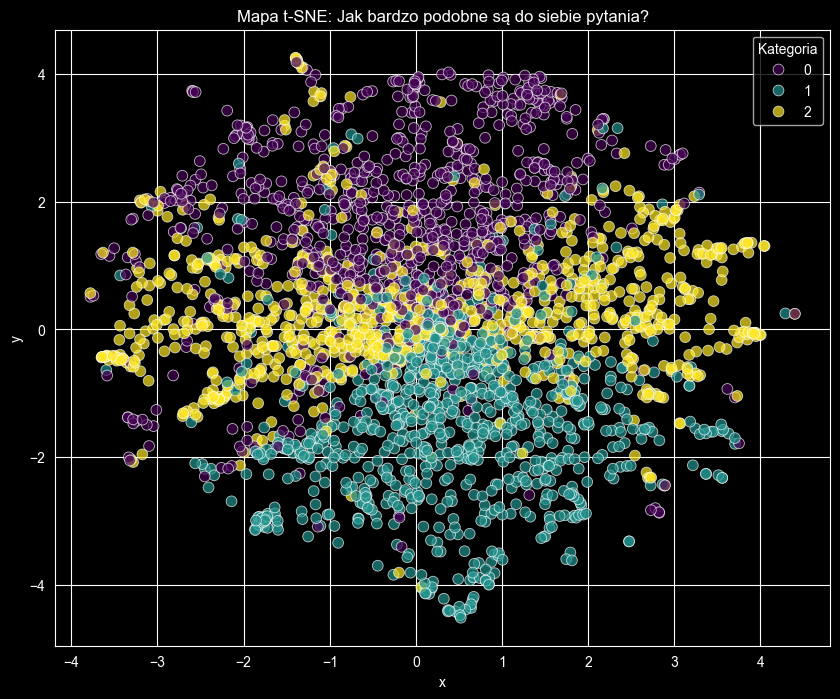

In [4]:
reporter.plot_tsne()

## Generowanie wykresów wordclouds dla każdej kategorii

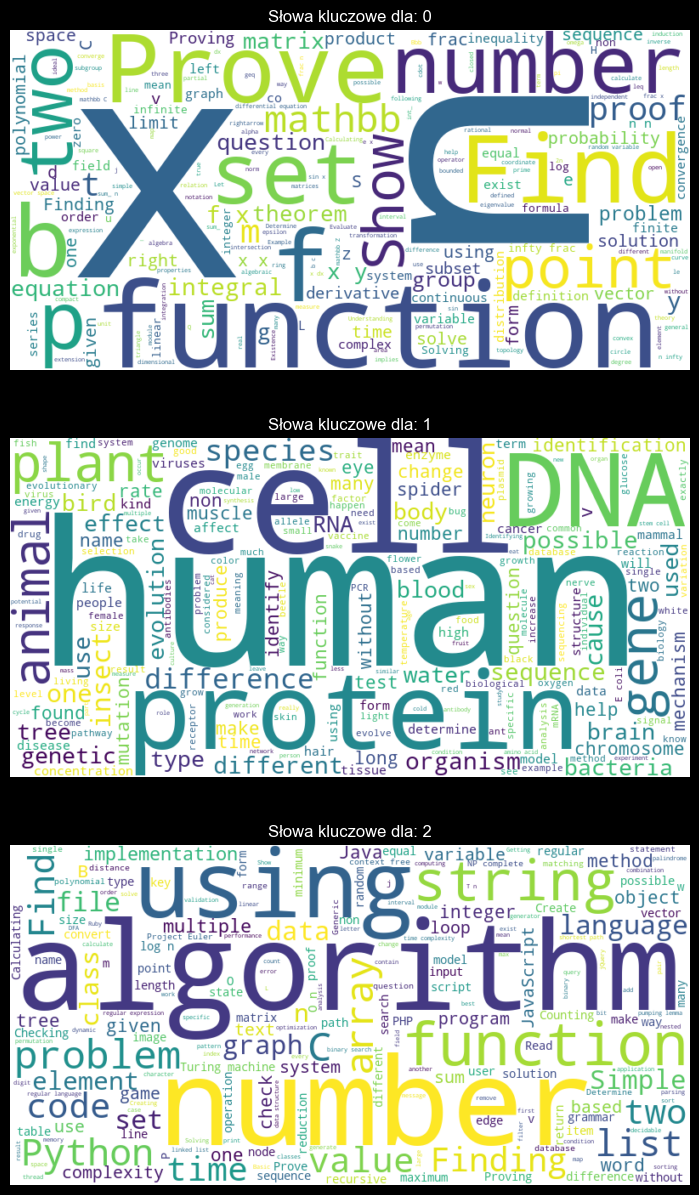

In [5]:
reporter.plot_wordclouds()

## Generowanie wykresu rozkładu pewności modelu

Zapisano rozkład pewności modelu: reports\2026-01-27_14-03-26_SVMModelWrapper\confidence_distr_plot.png


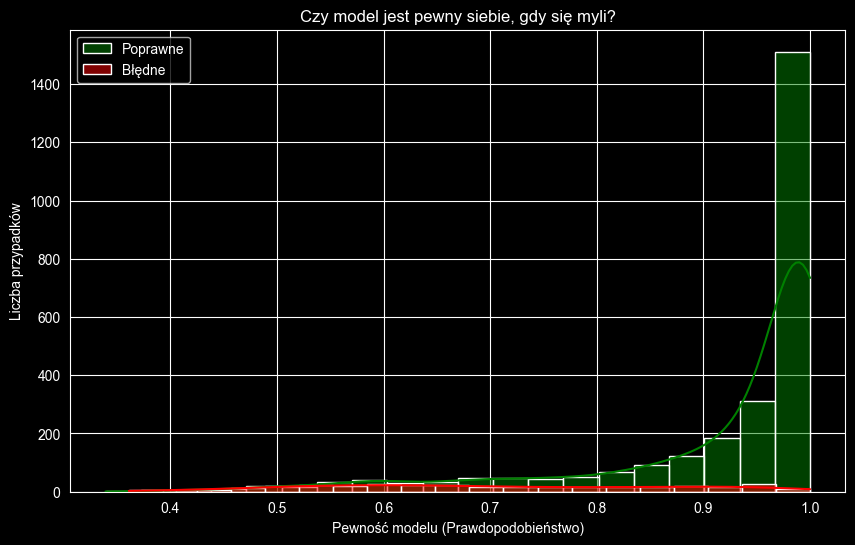

In [6]:
reporter.plot_confidence_distribution()